In [3]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
df=pd.read_csv('practiceDataset.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.shape

(1460, 81)

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())



In [9]:
le=LabelEncoder()
df['MSZoning']=le.fit_transform(df['MSZoning'])
df['Street']=le.fit_transform(df['Street'])
df['Alley']=le.fit_transform(df['Alley'])
df['LotShape']=le.fit_transform(df['LotShape'])
df['LandContour']=le.fit_transform(df['LandContour'])
df['Utilities']=le.fit_transform(df['Utilities'])
df['LotConfig']=le.fit_transform(df['LotConfig'])
df['LandSlope']=le.fit_transform(df['LandSlope'])
df['Neighborhood']=le.fit_transform(df['Neighborhood'])
df['Condition1']=le.fit_transform(df['Condition1'])
df['Condition2']=le.fit_transform(df['Condition2'])
df['BldgType']=le.fit_transform(df['BldgType'])
df['HouseStyle']=le.fit_transform(df['HouseStyle'])
df['SaleCondition']=le.fit_transform(df['SaleCondition'])
df['RoofStyle']=le.fit_transform(df['RoofStyle'])
df['RoofMatl']=le.fit_transform(df['RoofMatl'])
df['Exterior1st']=le.fit_transform(df['Exterior1st'])
df['Exterior2nd']=le.fit_transform(df['Exterior2nd'])
df['MasVnrType']=le.fit_transform(df['MasVnrType'])
df['ExterQual']=le.fit_transform(df['ExterQual'])
df['ExterCond']=le.fit_transform(df['ExterCond'])
df['Foundation']=le.fit_transform(df['Foundation'])
df['BsmtQual']=le.fit_transform(df['BsmtQual'])
df['BsmtCond']=le.fit_transform(df['BsmtCond'])
df['BsmtExposure']=le.fit_transform(df['BsmtExposure'])
df['BsmtFinType1']=le.fit_transform(df['BsmtFinType1'])
df['BsmtFinType2']=le.fit_transform(df['BsmtFinType2'])
df['Heating']=le.fit_transform(df['Heating'])
df['HeatingQC']=le.fit_transform(df['HeatingQC'])
df['CentralAir']=le.fit_transform(df['CentralAir'])
df['Electrical']=le.fit_transform(df['Electrical'])
df['KitchenQual']=le.fit_transform(df['KitchenQual'])
df['Functional']=le.fit_transform(df['Functional'])
df['FireplaceQu']=le.fit_transform(df['FireplaceQu'])
df['GarageType']=le.fit_transform(df['GarageType'])
df['GarageFinish']=le.fit_transform(df['GarageFinish'])
df['GarageQual']=le.fit_transform(df['GarageQual'])
df['GarageCond']=le.fit_transform(df['GarageCond'])
df['PavedDrive']=le.fit_transform(df['PavedDrive'])
df['PoolQC']=le.fit_transform(df['PoolQC'])
df['Fence']=le.fit_transform(df['Fence'])
df['MiscFeature']=le.fit_transform(df['MiscFeature'])
df['SaleType']=le.fit_transform(df['SaleType'])




In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

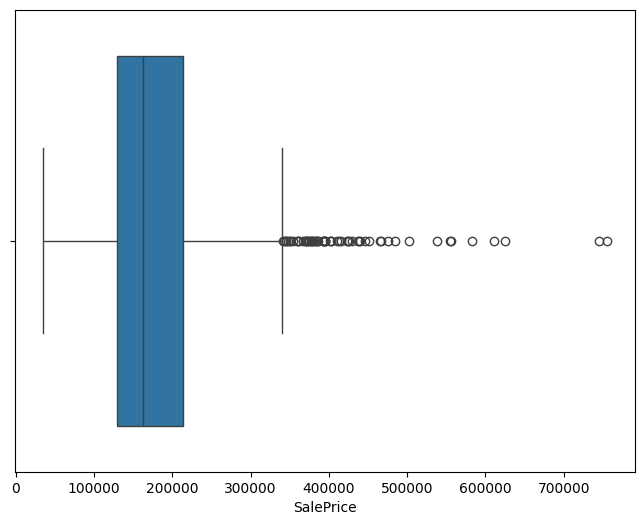

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.boxplot(x=df['SalePrice'])
plt.show()
                    

In [12]:
Q1=df['SalePrice'].quantile(0.25)
Q3=df['SalePrice'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound)
print(upper_bound)
outliers=[(df['SalePrice']<lower_bound)|(df['SalePrice']>upper_bound)]
print(outliers)

84025.0
3937.5
340037.5
[0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool]


In [13]:
df=df[~((df['SalePrice']>=(Q1-1.5*IQR))&(df['SalePrice']<(Q3+1.5*IQR)))]

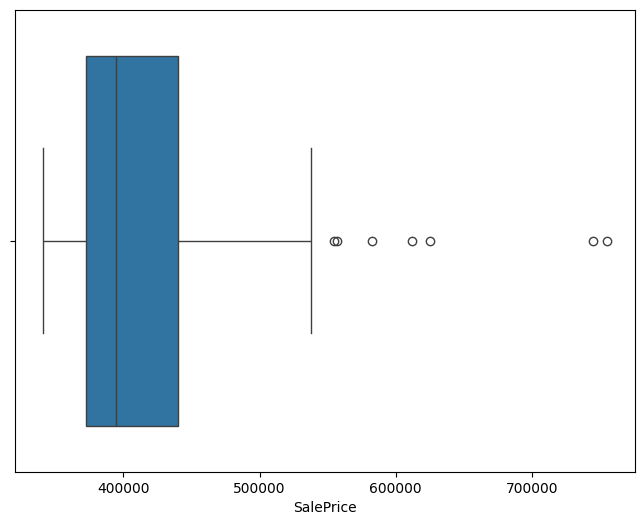

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.boxplot(x=df['SalePrice'])
plt.show()

scatter plot

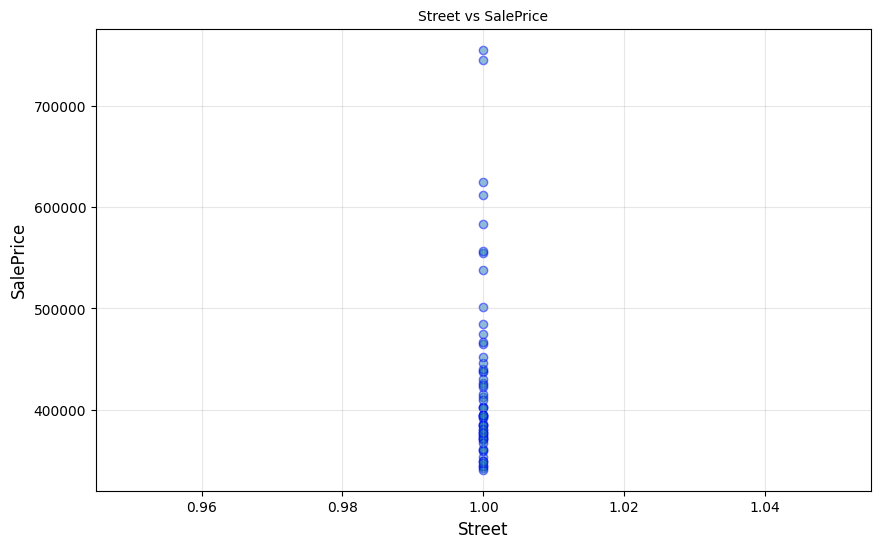

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['Street'],df['SalePrice'],alpha=0.5,edgecolors='b')
plt.title("Street vs SalePrice",fontsize=10)
plt.xlabel("Street",fontsize=12)
plt.ylabel("SalePrice",fontsize=12)
plt.grid(alpha=0.3)
plt.show()

heatmap

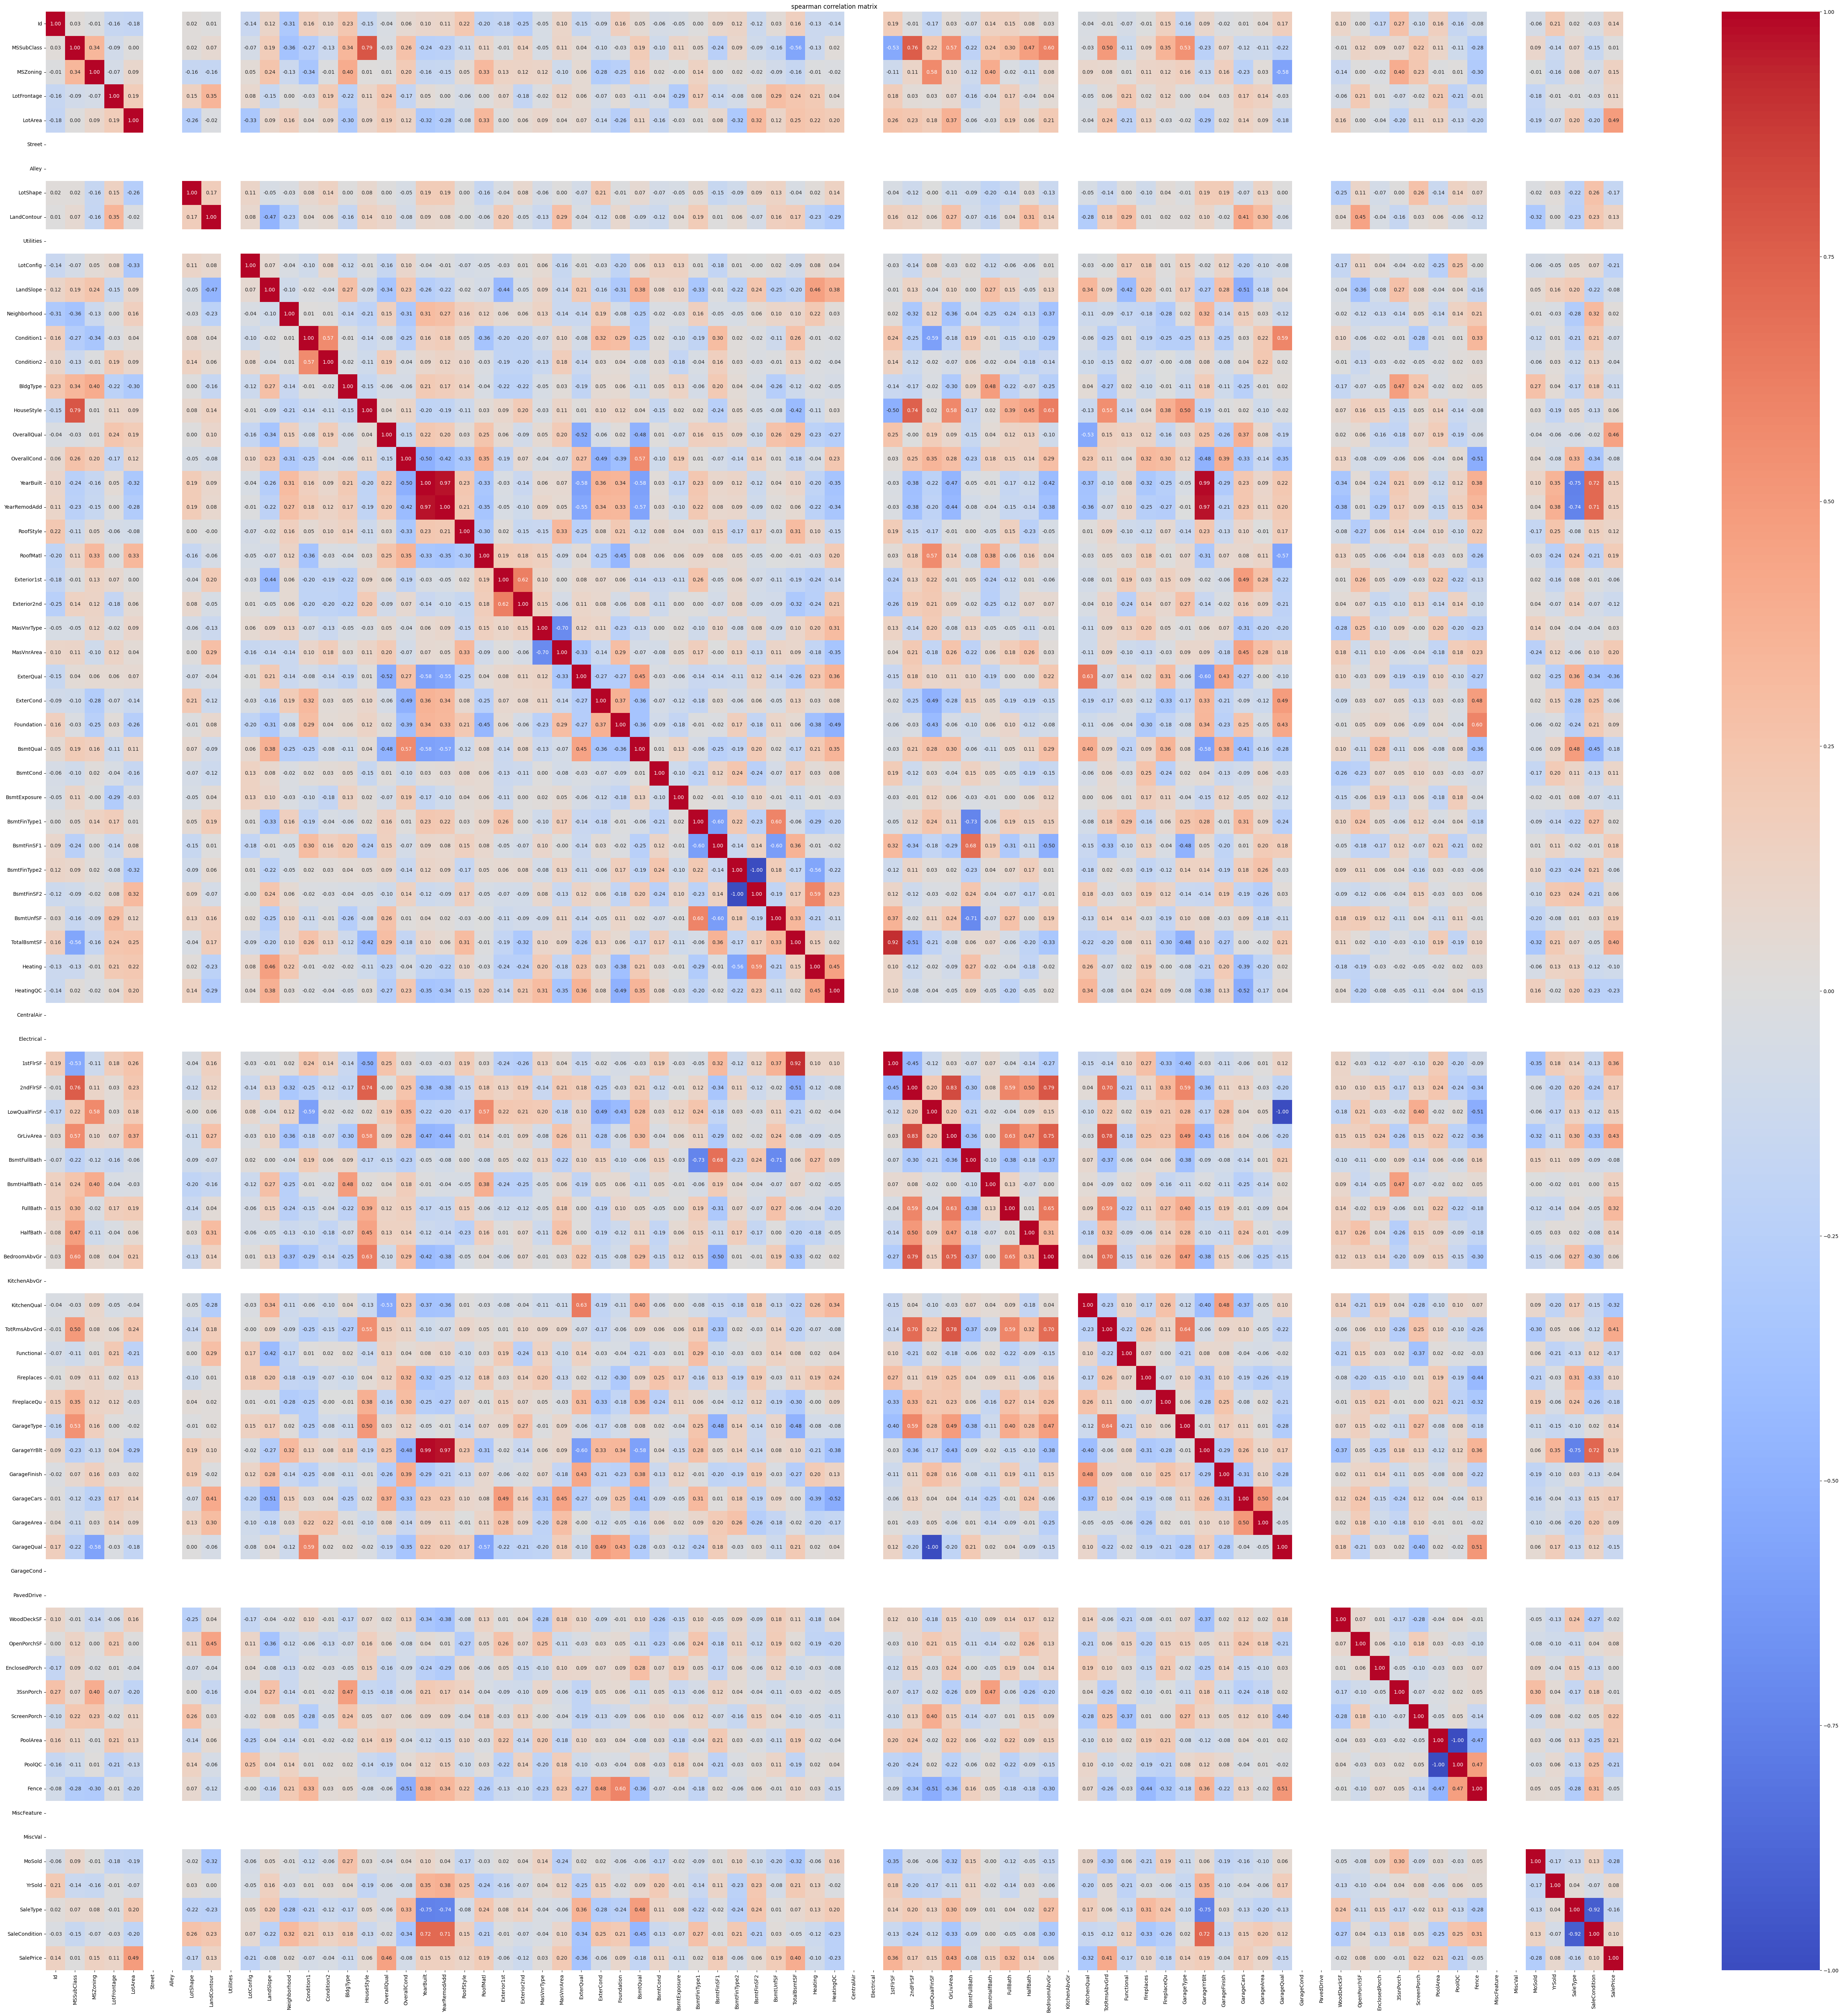

In [16]:
import seaborn as sns
plt.figure(figsize=(70,70))
spearman_corr=df.corr(method='spearman')
sns.heatmap(spearman_corr, annot=True,fmt=".2f",cmap='coolwarm',cbar=True)
plt.title('spearman correlation matrix')
plt.show()

In [17]:
df.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.104495,0.010544,-0.159768,-0.146668,NaN,NaN,0.015075,-0.041817,NaN,...,1.741113e-01,-1.741113e-01,-0.055089,NaN,NaN,-0.025123,0.198395,0.044157,-0.124185,0.202851
MSSubClass,0.104495,1.000000,0.326177,-0.078684,-0.107534,NaN,NaN,-0.015839,0.006631,NaN,...,8.648154e-02,-8.648154e-02,-0.234196,NaN,NaN,0.132005,-0.100502,0.013570,-0.132434,0.081492
MSZoning,0.010544,0.326177,1.000000,-0.033486,0.019759,NaN,NaN,-0.183942,-0.145611,NaN,...,1.538801e-16,-1.538801e-16,-0.293217,NaN,NaN,-0.058180,-0.156944,0.098588,-0.063950,0.074001
LotFrontage,-0.159768,-0.078684,-0.033486,1.000000,0.244246,NaN,NaN,0.100215,0.315846,NaN,...,3.692023e-01,-3.692023e-01,-0.057705,NaN,NaN,-0.133679,0.013674,0.056866,-0.262867,0.263884
LotArea,-0.146668,-0.107534,0.019759,0.244246,1.000000,NaN,NaN,-0.032718,-0.155949,NaN,...,-1.529740e-02,1.529740e-02,0.011826,NaN,NaN,-0.028855,0.110854,0.218016,-0.114050,0.025359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.025123,0.132005,-0.058180,-0.133679,-0.028855,NaN,NaN,-0.009193,-0.323449,NaN,...,2.198585e-02,-2.198585e-02,0.042229,NaN,NaN,1.000000,-0.140632,-0.093466,0.018420,-0.318039
YrSold,0.198395,-0.100502,-0.156944,0.013674,0.110854,NaN,NaN,0.032939,-0.009834,NaN,...,-6.989941e-02,6.989941e-02,0.085153,NaN,NaN,-0.140632,1.000000,0.018643,0.014561,0.017508
SaleType,0.044157,0.013570,0.098588,0.056866,0.218016,NaN,NaN,-0.192642,-0.207566,NaN,...,1.317263e-01,-1.317263e-01,-0.258036,NaN,NaN,-0.093466,0.018643,1.000000,-0.661060,0.020925
SaleCondition,-0.124185,-0.132434,-0.063950,-0.262867,-0.114050,NaN,NaN,0.205024,0.173108,NaN,...,-6.965080e-01,6.965080e-01,0.351814,NaN,NaN,0.018420,0.014561,-0.661060,1.000000,-0.283292


barplot 

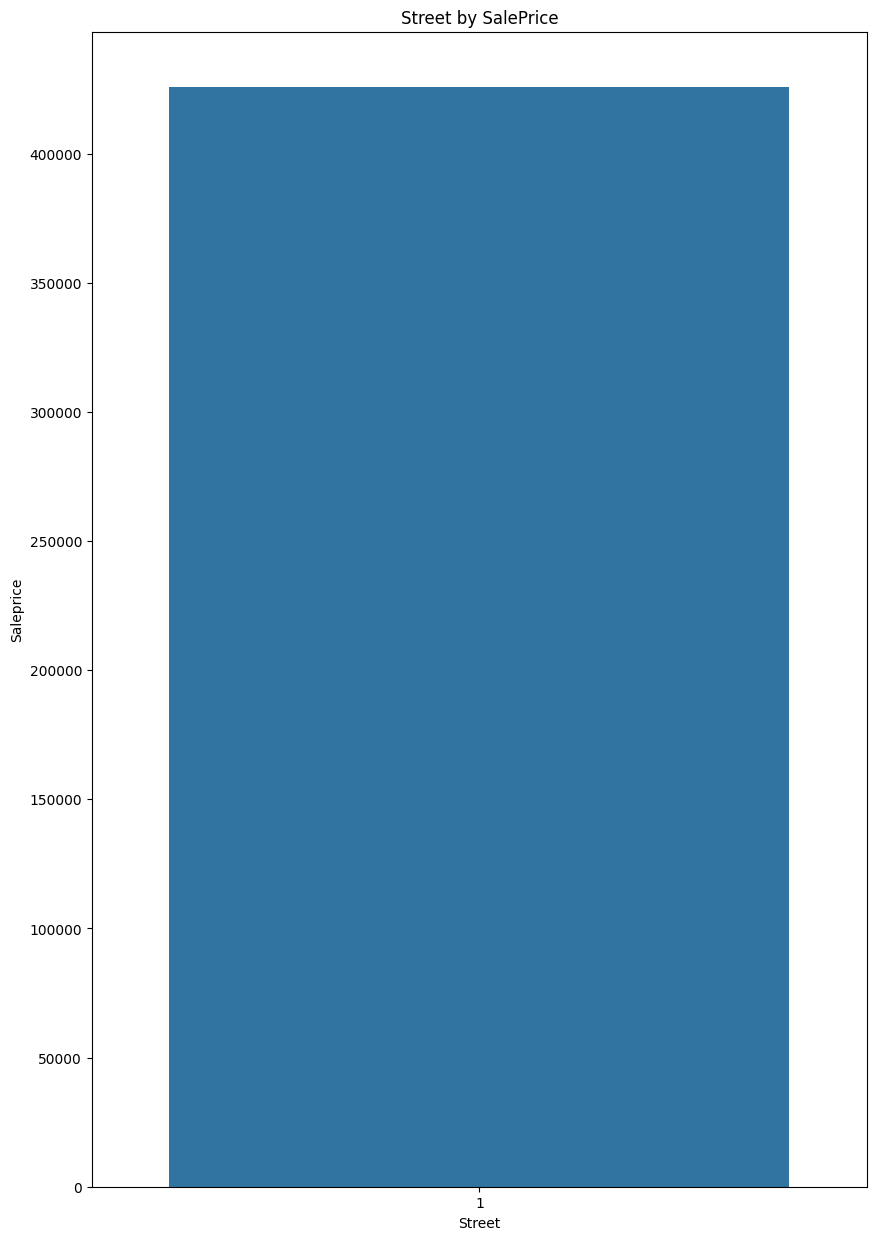

In [18]:
plt.figure(figsize=(10,15))
sns.barplot(x='Street', y='SalePrice',data=df,errorbar=None)
plt.title("Street by SalePrice")
plt.xlabel("Street")
plt.ylabel("Saleprice")
plt.show()

In [ ]:
hitsplot

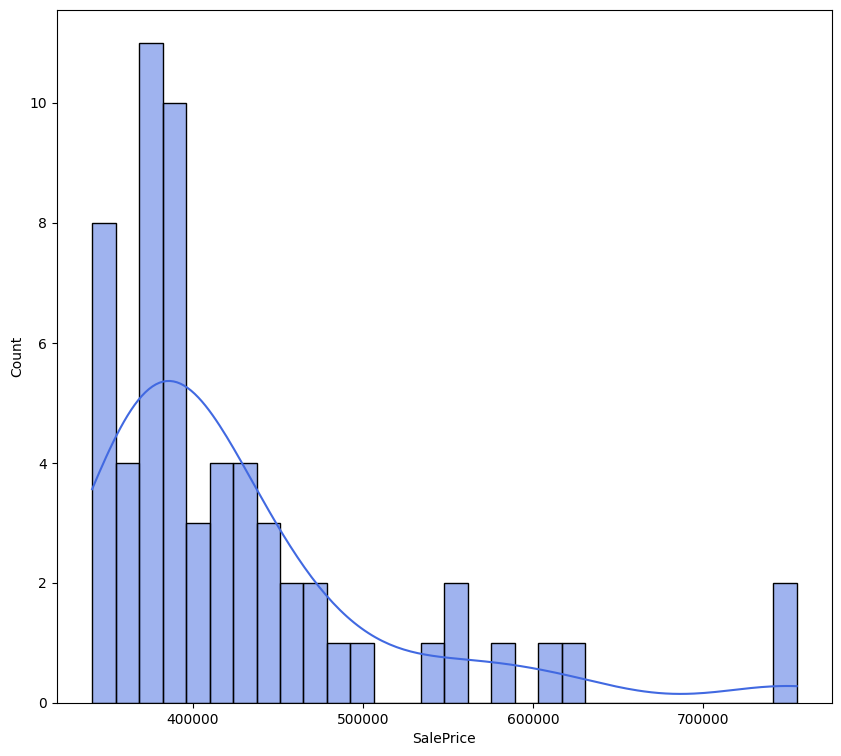

In [19]:
plt.figure(figsize=(10,9))
sns.histplot(df['SalePrice'].dropna(),bins=30,kde=True,color='royalblue')
plt.show()

<Axes: xlabel='Street', ylabel='SalePrice'>

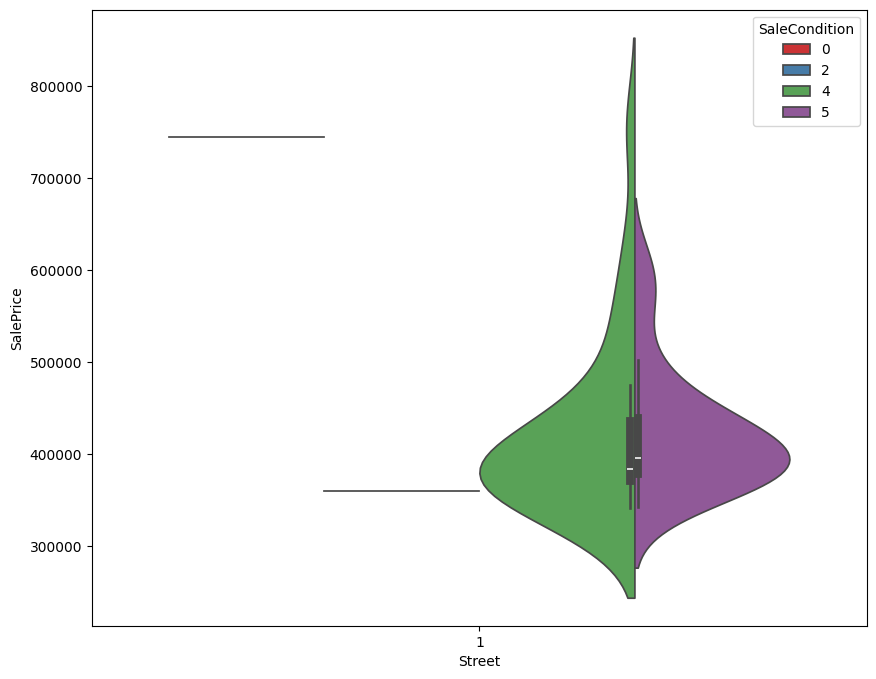

In [49]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Street',y='SalePrice',hue='SaleCondition',data=df,split=True,palette='Set1')

<Axes: xlabel='Street', ylabel='SalePrice'>

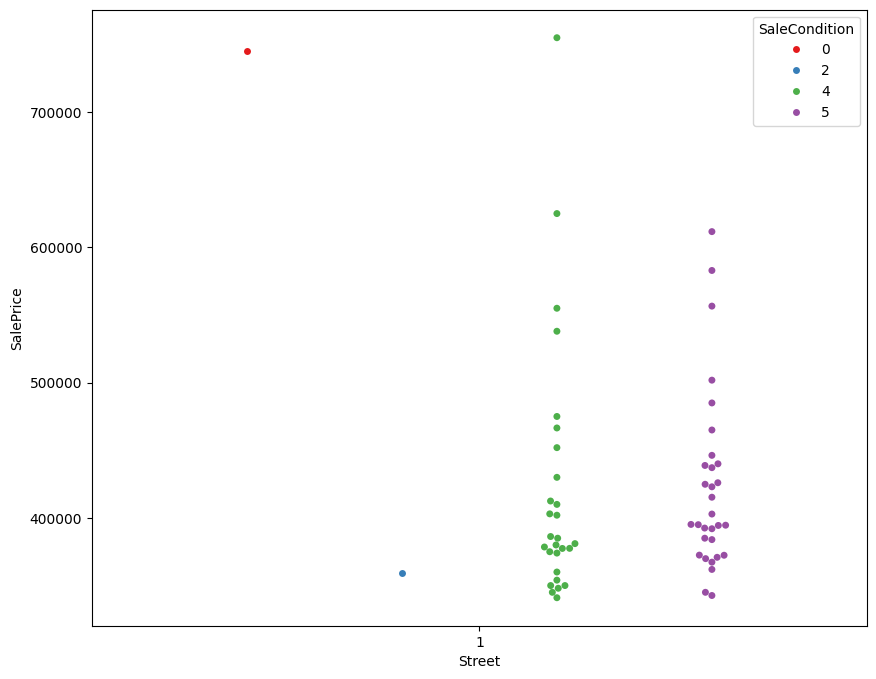

In [27]:
plt.figure(figsize=(10,8))
sns.swarmplot(x='Street',y='SalePrice',hue='SaleCondition',data=df,palette="Set1",dodge=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8236\3997110337.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['SalePrice'].dropna(),color='skyblue',shade=True)


<Axes: xlabel='SalePrice', ylabel='Density'>

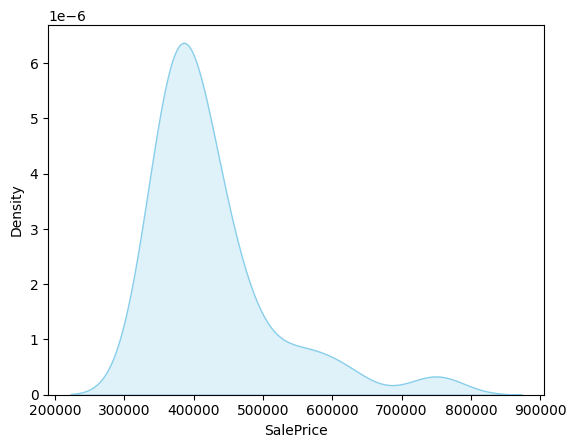

In [46]:
import seaborn as sns
sns.kdeplot(data=df['SalePrice'].dropna(),color='skyblue',shade=True)

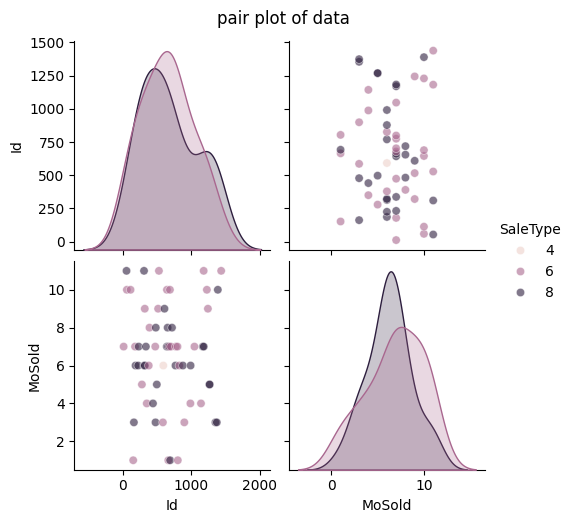

In [43]:
sns.pairplot(df[['Id','MoSold','SaleType']],
             hue='SaleType',
             plot_kws={'alpha':0.6},diag_kind='kde')
plt.suptitle('pair plot of data',y=1.03)
plt.show()